# Music Representation

For music, data can be represented using either a continuous or discrete form. The most common continuous form is an audio signal, typically stored as a WAV file. Common discrete forms include Musical Instrument Digital Interface (MIDI) files, pianoroll, and text. We will focus on MIDI files and will extract two types of symbolic objects: notes and chords.

__MIDI (Musical Instrument Digital Interface)__ is a protocol which allows electronic instruments and other digital musical tools to communicate with each other. Since a MIDI file only represents player information, i.e., a series of messages like ‘note on’, ‘note off, it is more compact, easy to modify, and can be adapted to any instrument. Before we move forward, let us understand some music related terminologies:

__A note__ is a symbolic representation of a sound. For our purposes, a note can be described by its pitch and duration. __A note's pitch__ is related to the frequency of oscillation of its sound wave, which is measured in hertz (Hz). Notes with higher pitches have sound waves with more oscillations per second. __A note's duration__ is the length of the period over which it is played.

MIDI files represent a note's pitch with an integer between 0 and 127. Notes may also be represented by a pitch letter and octave number. Within the same octave, the pitches are ordered from lowest to highest frequency as follows:
<ul>
    <li> C </li>
    <li> C#/D♭ </li>
    <li> D </li>
    <li> E♭/D# </li>
    <li> E </li>
    <li> F </li>
    <li> F#/G♭ </li>
    <li> G </li>
    <li> A♭/G# </li>
    <li> A </li>
    <li> B♭/A# </li>
    <li> B </li>
</ul>

_Note:_
   B♭/A# means that A# is __enharmonically equivalent__ to (i.e. has the same pitch as) B♭, although harmonically and in the composer’s intention they are different.

The octave is indicated by a subscript, such as the 4 in A4 or the 7 in C7. A higher octave corresponds to a higher frequency. If we take an arbitrary pitch, Xi, then the pitch Xi+1, which is exactly one octave higher, represents a sound wave with twice the frequency of Xi.

In addition to a note's pitch, we will also make use of its duration. The duration is a relative value, which is normalized by the length of a whole note. The longest note is a "large" note, which is eight times as long as a whole note. The shortest note is a two hundred fifty-sixth note, which is 1/256th the length of a whole note.

__A chord__ is a combination of two or more notes played simultaneously on the same instrument. If we look at __monophonic music__ - that is, music played on a single instrument - we may identify chords by assuming that all notes played at the exact same time are part of the same chord. This assumption is not valid if we have __polyphonic music__, which consists of two or more instruments playing simultaneously.

Supervised machine learning models can be divided into two categories: discriminative models and generative models. __Discriminative models__ identify a decision boundary and produce a corresponding classification. __Generative models__ create new instances of a class.

A discriminative model of music could be used to classify songs into different genres. A generative model might compose songs of a particular genre. In this tutorial, we'll make use of generative models to compose music.

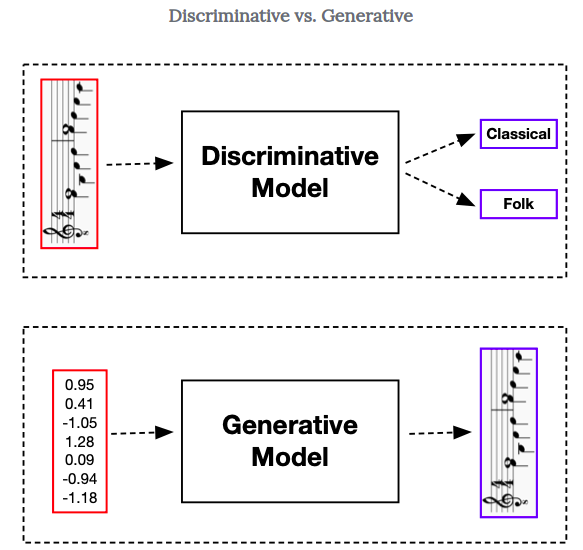

# Data Collection

We will use data from [Project Mutopia](https://www.mutopiaproject.org/), which contains 2 124 publicly available compositions in MIDI (Musical Instrument Digital Interface) format. As it is possible to filter compositions based on instruments, we will use a simple python script to collect all guitar compositions.

## Note and Chord Encoding

So, we decided to use MIDI files for music representation. The issue still remains of how to encode this representation. The encoding of a representation (of a musical content) consists in the mapping of the representation (composed of a set of variables, e.g., pitch or dynamics) into a set of inputs (also named input nodes or input variables) for the neural network architecture.

With respect to the choice of encoding, [Briot, Hadjerest, and Pachet (2019)](https://arxiv.org/pdf/1709.01620.pdf) discuss four different options that are commonly used in generative models of music:

<ul>
    <li> One-hot Encoding </li>
    <li> Many-hot Encoding </li>
    <li> Multi-one-hot Encoding </li>
    <li> Multi-many-one-hot Encoding </li>
</ul>

__One-hot encoding__ represents musical symbols, such as notes and chords, as sparse vectors with a one in the position that corresponds to a particular note or chord. __Many-hot encoding__ represents chords, which consist of multiple notes, by placing a one in the position that corresponds to each of the notes.

In the diagram below, we compare many-hot and one-hot encodings for the case where we have notes and two-note chords. With many-hot encodings, the notes C4 and D4 are represented by vectors with 128 elements. Both vectors have zeros in all positions other than the positions that correspond to the C4 and D4 elements, which contain ones. The C4+D4 chord, which is the product of playing notes C4 and D4 simultaneously, is constructed by placing ones in both the C4 and D4 positions.

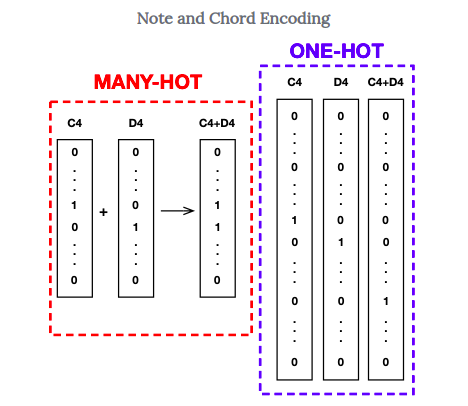

The one-hot representation of single notes and two-note chords consists of 8256-element vectors. In each case, a vector is sparse and contains a 1 in the position that corresponds to a unique note or chord. Notice that the many-hot representation requires the use of a multi-label model, where multiple classes may be predicted for a given output. It does, however, substantially reduce the size of the input and output vectors.

__Multi-one-hot encodings__ and __multi-many-hot encodings__ are the generalizations of one-hot and many-hot encoding to the case where we have polyphonic. We will restrict ourselves to monophonic music and will not discuss these options.

# Models

We'll consider three different models of music generation, starting with the simplest:

<ul>
    <li> The Autoencoder </li>
    <li> The Variational Autoencoder (VAE) </li>
    <li> The Long Short-Term Memory Model (LSTM) </li>
</ul>

We trained each model over the same data set from which the polyphonic melodies were ejected.

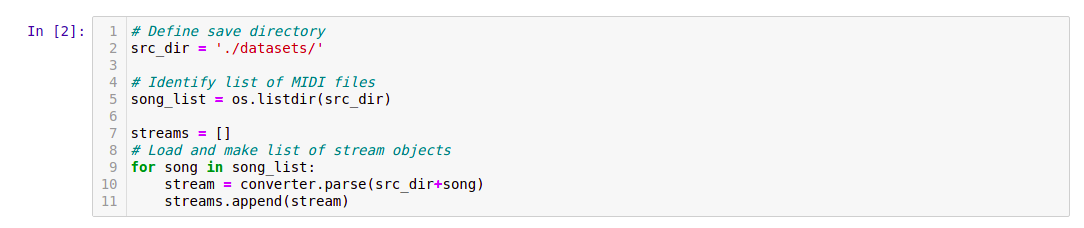

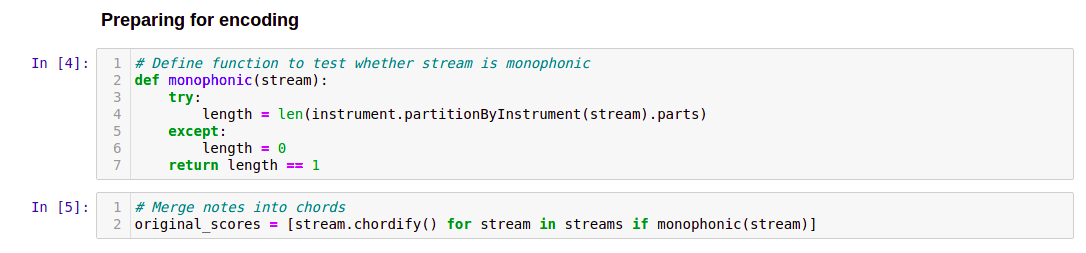

Also, the functions that map notes to numbers and vice versa are the same for all three models.

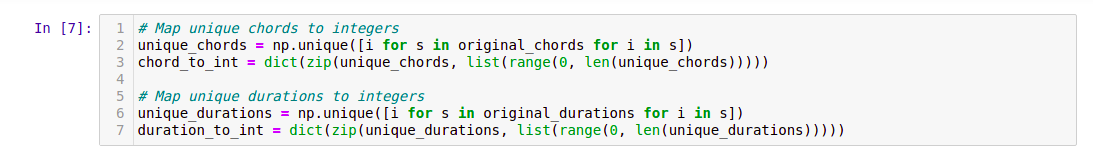

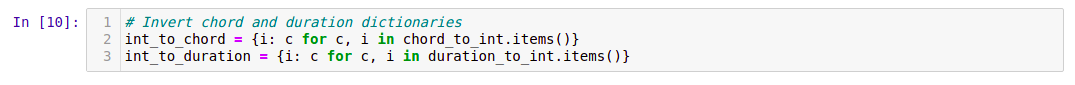

After this preparation we create models. It is difficult to compare models quantitatively. The only thing we can do is trust our ears. The track generated by LSTM sounds the best, the most harmonious. The results would have been better if we had used a larger set of data and polyphonic melodies.